<a href="https://colab.research.google.com/github/heitor-savoia/AIRBNB_modelo_preditivo_preco_de_imovel/blob/main/Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando as bibliotecas

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 6. Análise de dados

### Importando a base de dados

In [72]:
df = pd.read_csv("sample_medicare.csv", sep=",")
df.head()

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_30_day_fill_count,total_day_supply,total_drug_cost,bene_count_ge65,bene_count_ge65_suppress_flag,total_claim_count_ge65,ge65_suppress_flag,total_30_day_fill_count_ge65,total_day_supply_ge65,total_drug_cost_ge65
0,1750477758,RICHARDSON,FAZAL,GORMAN,IN,Optometry,S,HYDROCHLOROTHIAZIDE,CLOPIDOGREL BISULFATE,NaN,34,30.0,16800,1075.11,NaN,*,NaN,#,15.0,1140.0,NaN
1,1265604870,JOHNSON,PETER,FOUNTAIN VALLEY,IL,Nurse Practitioner,S,OXYCODONE HCL,GLIMEPIRIDE,NaN,249,12.0,3510,532.98,NaN,NaN,27.0,*,0.0,364.0,937.41
2,1295731255,MCMANMON,JONATHAN,POMPANO BEACH,IA,Family Practice,S,MECLIZINE HCL,GABAPENTIN,27.0,12,14.3,1440,485.72,NaN,#,46.0,NaN,38.0,NaN,0.00
3,1356337398,EAKES,KIRK,AUSTIN,VA,Nephrology,S,WARFARIN SODIUM,ZIPRASIDONE HCL,21.0,25,23.0,600,256.14,NaN,#,11.0,NaN,NaN,NaN,0.00
4,1265409056,WYNN,SARA,SMYRNA,OR,Physician Assistant,S,PAROXETINE HCL,VALPROIC ACID,NaN,203,112.0,1680,4013.17,NaN,*,14.0,#,88.9,NaN,NaN


### Analisando a base de dados

#### Tipos de variáveis

In [73]:
df.dtypes

npi                                int64
nppes_provider_last_org_name      object
nppes_provider_first_name         object
nppes_provider_city               object
nppes_provider_state              object
specialty_description             object
description_flag                  object
drug_name                         object
generic_name                      object
bene_count                       float64
total_claim_count                  int64
total_30_day_fill_count          float64
total_day_supply                   int64
total_drug_cost                  float64
bene_count_ge65                  float64
bene_count_ge65_suppress_flag     object
total_claim_count_ge65           float64
ge65_suppress_flag                object
total_30_day_fill_count_ge65     float64
total_day_supply_ge65            float64
total_drug_cost_ge65             float64
dtype: object

#### Quantidade de nulos

In [74]:
df.isnull().sum(axis=0)

npi                                  0
nppes_provider_last_org_name         3
nppes_provider_first_name            2
nppes_provider_city                  0
nppes_provider_state                 0
specialty_description                0
description_flag                     0
drug_name                            0
generic_name                         0
bene_count                       61372
total_claim_count                    0
total_30_day_fill_count              0
total_day_supply                     0
total_drug_cost                      0
bene_count_ge65                  86087
bene_count_ge65_suppress_flag    13841
total_claim_count_ge65           42521
ge65_suppress_flag               57945
total_30_day_fill_count_ge65     42103
total_day_supply_ge65            42236
total_drug_cost_ge65             42339
dtype: int64

In [75]:
pd.DataFrame(df.isnull().sum(axis=0)).sort_values(by=0, ascending=False)/df.shape[0]

,0
bene_count_ge65,0.86087
bene_count,0.61372
ge65_suppress_flag,0.57945
total_claim_count_ge65,0.42521
total_drug_cost_ge65,0.42339
total_day_supply_ge65,0.42236
total_30_day_fill_count_ge65,0.42103
bene_count_ge65_suppress_flag,0.13841
nppes_provider_last_org_name,0.00003
nppes_provider_first_name,0.00002


#### Método descibre

In [76]:
df.describe(percentiles=[0.001,  0.01, 0.10, 0.25, 0.50, 0.75, 0.90, 0.99, 0.999])

,npi,bene_count,total_claim_count,total_30_day_fill_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_30_day_fill_count_ge65,total_day_supply_ge65,total_drug_cost_ge65
count,1.000000e+05,38628.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,13913.000000,57479.000000,57897.000000,57764.000000,5.766100e+04
mean,1.498548e+09,28.713576,51.137660,74.597419,2109.676730,4.245201e+03,19.835118,48.060909,73.799373,2062.670591,3.465718e+03
std,2.880663e+08,27.706786,84.221171,129.506376,3929.466465,2.567230e+04,32.208941,94.803685,138.798766,3872.993071,2.243156e+04
min,1.003000e+09,11.000000,11.000000,11.000000,11.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00
0.1%,1.003084e+09,11.000000,11.000000,11.000000,22.999000,2.555999e+01,0.000000,0.000000,0.000000,0.000000,0.000000e+00
1%,1.003999e+09,11.000000,11.000000,11.000000,68.000000,4.535980e+01,0.000000,0.000000,0.000000,0.000000,0.000000e+00
10%,1.104009e+09,12.000000,12.000000,13.000000,288.000000,1.204800e+02,0.000000,11.000000,11.000000,107.000000,5.459000e+01
25%,1.245488e+09,14.000000,15.000000,19.000000,449.000000,2.517975e+02,0.000000,13.000000,15.600000,390.000000,1.984100e+02
50%,1.497844e+09,20.000000,24.000000,34.000000,900.000000,6.761400e+02,13.000000,21.000000,31.000000,854.000000,5.987300e+02
75%,1.740577e+09,32.000000,51.000000,72.000000,2010.000000,2.363220e+03,24.000000,46.000000,69.000000,1950.000000,2.104990e+03


#### Histograma

<function matplotlib.pyplot.show>

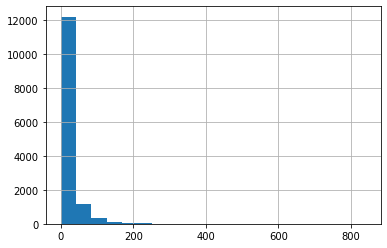

In [77]:
df['bene_count_ge65'].dropna().hist(bins=20)
plt.show

#### Variáveis Descritivas

In [78]:
df['description_flag'].value_counts(dropna=False)

S    97586
T     2414
Name: description_flag, dtype: int64

In [79]:
df['ge65_suppress_flag'].value_counts(dropna=False)

NaN    57945
#      27365
*      14690
Name: ge65_suppress_flag, dtype: int64

#### Plotando um gráfico de barras

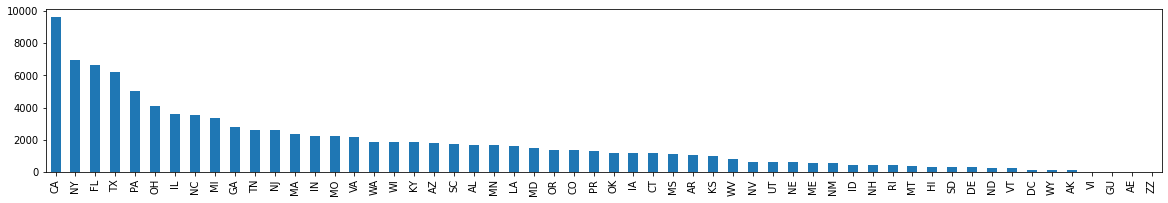

In [80]:
fig, axs = plt.subplots(figsize=(20,3))
df['nppes_provider_state'].value_counts(dropna=False).plot(kind='bar')

## 8. Estruturação dos dados

### Criando um DataFrame de exemplo

In [81]:
data_consumo = {
    0: {"id": "xx1", "dt_consumo": "2020-11-03", "vl_consumo": 50},
    1: {"id": "xx1", "dt_consumo": "2020-11-15", "vl_consumo": 21},
    2: {"id": "xx2", "dt_consumo": "2020-11-18", "vl_consumo": 33},
    3: {"id": "xx2", "dt_consumo": "2020-12-16", "vl_consumo": 23},
    4: {"id": "xx3", "dt_consumo": "2020-11-06", "vl_consumo": 45},
    5: {"id": "xx4", "dt_consumo": "2020-12-18", "vl_consumo": 46},
    6: {"id": "xx4", "dt_consumo": "2020-11-18", "vl_consumo": 12},
    7: {"id": "xx4", "dt_consumo": "2020-11-04", "vl_consumo": 34},
}

In [82]:
data_id = {
    0: {"id": "xx1", "dt_compra": "2020-12-01", "flg_comprou": 1},
    1: {"id": "xx2", "dt_compra": "2020-12-15", "flg_comprou": 1},
    2: {"id": "xx3", "dt_compra": np.nan, "flg_comprou": 0},
    3: {"id": "xx4", "dt_compra": np.nan, "flg_comprou": 0}
}

In [83]:
df_consumo = pd.DataFrame.from_dict(data_consumo).transpose()
df_id = pd.DataFrame.from_dict(data_id).transpose()

In [84]:
df_consumo.head()

,id,dt_consumo,vl_consumo
0,xx1,2020-11-03,50
1,xx1,2020-11-15,21
2,xx2,2020-11-18,33
3,xx2,2020-12-16,23
4,xx3,2020-11-06,45


In [85]:
df_id.head()

,id,dt_compra,flg_comprou
0,xx1,2020-12-01,1
1,xx2,2020-12-15,1
2,xx3,NaN,0
3,xx4,NaN,0


### Método Merge

In [86]:
df_merge = pd.merge(df_id, df_consumo, left_on='id', right_on='id', how='left')
df_merge

,id,dt_compra,flg_comprou,dt_consumo,vl_consumo
0,xx1,2020-12-01,1,2020-11-03,50
1,xx1,2020-12-01,1,2020-11-15,21
2,xx2,2020-12-15,1,2020-11-18,33
3,xx2,2020-12-15,1,2020-12-16,23
4,xx3,NaN,0,2020-11-06,45
5,xx4,NaN,0,2020-12-18,46
6,xx4,NaN,0,2020-11-18,12
7,xx4,NaN,0,2020-11-04,34


### Método LOC

In [87]:
df_merge.loc[df_merge.dt_compra.isna(), 'dt_compra'] = '2020-12-15'
df_merge

,id,dt_compra,flg_comprou,dt_consumo,vl_consumo
0,xx1,2020-12-01,1,2020-11-03,50
1,xx1,2020-12-01,1,2020-11-15,21
2,xx2,2020-12-15,1,2020-11-18,33
3,xx2,2020-12-15,1,2020-12-16,23
4,xx3,2020-12-15,0,2020-11-06,45
5,xx4,2020-12-15,0,2020-12-18,46
6,xx4,2020-12-15,0,2020-11-18,12
7,xx4,2020-12-15,0,2020-11-04,34


In [88]:
df_select = df_merge.loc[df_merge.dt_consumo < df_merge.dt_compra]
df_select

,id,dt_compra,flg_comprou,dt_consumo,vl_consumo
0,xx1,2020-12-01,1,2020-11-03,50
1,xx1,2020-12-01,1,2020-11-15,21
2,xx2,2020-12-15,1,2020-11-18,33
4,xx3,2020-12-15,0,2020-11-06,45
6,xx4,2020-12-15,0,2020-11-18,12
7,xx4,2020-12-15,0,2020-11-04,34


### Método GROUPBY

In [89]:
df_select[['id', 'vl_consumo']].groupby(by='id').sum()

,vl_consumo
id,
xx1,71
xx2,33
xx3,45
xx4,46


In [90]:
df_agg = df_select[['id', 'dt_consumo', 'vl_consumo']].groupby(by="id").agg({
    'dt_consumo': 'max',
    'vl_consumo': ['sum','min','max'],
    'id': 'count'
})

df_agg

dt_consumo vl_consumo            id
            max        sum min max count
id                                      
xx1  2020-11-15         71  21  50     2
xx2  2020-11-18         33  33  33     1
xx3  2020-11-06         45  45  45     1
xx4  2020-11-18         46  12  34     2

In [91]:
df_agg.columns = ['.'.join(col).strip() if col[1] != "" else col[0] for col in df_agg.columns.values]
df_agg

,dt_consumo.max,vl_consumo.sum,vl_consumo.min,vl_consumo.max,id.count
id,,,,,
xx1,2020-11-15,71,21,50,2
xx2,2020-11-18,33,33,33,1
xx3,2020-11-06,45,45,45,1
xx4,2020-11-18,46,12,34,2


## 10. PIVOT Table e One-hot Encoding

### Pivot Table

In [92]:
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo", "bar", "bar", "bar", "bar"],
                   "B": ["one", "one", "one", "two", "two", "one", "one", "two", "two"], 
                   "C": ["small", "large", "large", "small", "small", "large", "small", "small", "large"], 
                   "D": [1, 2, 2, 3, 3, 4, 5, 6, 7], 
                   "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]})

df

,A,B,C,D,E
0,foo,one,small,1,2
1,foo,one,large,2,4
2,foo,one,large,2,5
3,foo,two,small,3,5
4,foo,two,small,3,6
5,bar,one,large,4,6
6,bar,one,small,5,8
7,bar,two,small,6,9
8,bar,two,large,7,9


In [93]:
table = pd.pivot_table(df, values = 'D', index = ['A', 'B'],
                       columns = ['C'], aggfunc = np.sum, fill_value = 0)

table

C        large  small
A   B                
bar one      4      5
    two      7      6
foo one      4      1
    two      0      6

In [94]:
table = pd.pivot_table(df, values = ['D', 'E'], index = ['A', 'B'],
                       aggfunc = {'D': np.sum,
                                  'E': [min, max, np.mean]})

table

D    E               
        sum  max      mean  min
A   B                          
bar one   9  8.0  7.000000  6.0
    two  13  9.0  9.000000  9.0
foo one   5  5.0  3.666667  2.0
    two   6  6.0  5.500000  5.0

### ONE-HOT ENCODING

In [95]:
df = pd.DataFrame({'animal': ['dog', 'cat', 'dog'], 'sexo': ['macho', 'femea', 'femea'],
                   'idade': [1, 2, 3]})

df

,animal,sexo,idade
0,dog,macho,1
1,cat,femea,2
2,dog,femea,3


In [96]:
pd.get_dummies(df, prefix = ['animal', 'sexo'], drop_first=True)

,idade,animal_dog,sexo_macho
0,1,1,1
1,2,0,0
2,3,1,0


### CAT CODES

In [97]:
# transformar em variável categória
for col in ['animal', 'sexo']:
  df[col] = df[col].astype('category')

cat_columns = df.select_dtypes(['category']).columns

map_categ_cols = {}

for col in cat_columns:
  map_categ_cols = dict( enumerate(df[col].cat.categories))

print(map_categ_cols)

df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

df

{0: 'femea', 1: 'macho'}


,animal,sexo,idade
0,1,1,1
1,0,0,2
2,1,0,3


## 13 - 16. Limpeza, Seleção e Filtragem de Dados

### 13. Tratamento de Nulos

In [98]:
df = pd.DataFrame([(0.0, np.nan, -1.0, 1.0),
                   (np.nan, 2.0, np.nan, np.nan),
                   (2.0, 3.0, np.nan, 9.0),
                   (np.nan, 4.0, -4.0, 16.0)],
                  columns=list('abcd'))
df

,a,b,c,d
0,0.0,NaN,-1.0,1.0
1,NaN,2.0,NaN,NaN
2,2.0,3.0,NaN,9.0
3,NaN,4.0,-4.0,16.0


#### Fill Value

Preenchimento dos registros que estão nulos, com um valor de escolha própria

In [99]:
# média

fill_value = df.b.mean()
df['b'].fillna(fill_value)

# mediana 

fill_value = df.b.median()
df['b'].fillna(fill_value)

# valor escolhido

fill_value = 10
df['b'].fillna(fill_value)

0    10.0
1     2.0
2     3.0
3     4.0
Name: b, dtype: float64

In [100]:
fill_value = df.b.mean()
df['b'] = df['b'].fillna(fill_value)

df

,a,b,c,d
0,0.0,3.0,-1.0,1.0
1,NaN,2.0,NaN,NaN
2,2.0,3.0,NaN,9.0
3,NaN,4.0,-4.0,16.0


#### Excluir a linha

In [101]:
df.dropna(subset=['a'])

,a,b,c,d
0,0.0,3.0,-1.0,1.0
2,2.0,3.0,NaN,9.0


#### Interpolate



In [102]:
# method = (pode ser exponencial, quadrático, entre demais formas)

df.interpolate(method='linear', limit_direction='forward', axis=0)

,a,b,c,d
0,0.0,3.0,-1.0,1.0
1,1.0,2.0,-2.0,5.0
2,2.0,3.0,-3.0,9.0
3,2.0,4.0,-4.0,16.0


#### Forward / Backward Filling


bfill - vai preencher para trás, olhando o último valor nulo, preenchimento inverso

ffill - olho o que tenho na frente do valor nulo e preencho com este valor, basicamente é ao contrário do bfill



In [103]:
# method = {'backfill', 'bfill', 'pad', 'ffill'}

df.fillna(method='bfill')

,a,b,c,d
0,0.0,3.0,-1.0,1.0
1,2.0,2.0,-4.0,9.0
2,2.0,3.0,-4.0,9.0
3,NaN,4.0,-4.0,16.0


### 14. Tratamento de Outliers

#### IQR

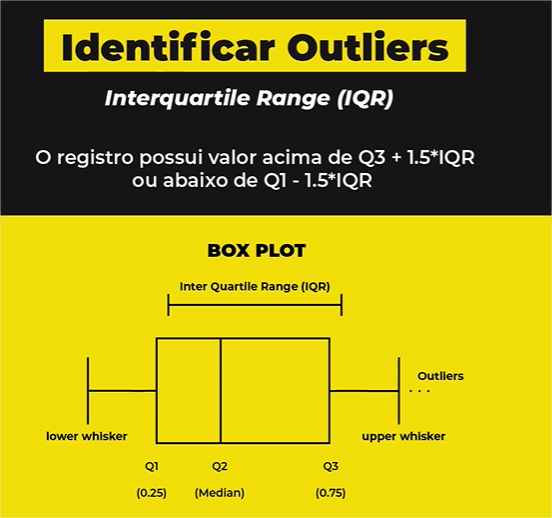

Correção dos Outliers, podemos optar por duas soluções:
1. Remoção dos mesmos
2. Preenchimento dos mesmos com outros valores utilizando - (min/max aceitáveis) ou método Fill (média / mediana / moda / valor default) 

In [104]:
import random 
df = pd.DataFrame([random.gauss(0, sigma=1) for i in range(5000)],columns=["value"])
df.loc[df.sample(10).index,"value"] += 3
df.loc[df.sample(10).index,"value"] -= 3
df

,value
0,1.308504
1,-0.717363
2,-0.442210
3,1.855773
4,-0.105583
...,...
4995,0.274722
4996,1.211932
4997,-0.142537
4998,-0.392193


In [105]:
Q1 = df['value'].quantile(0.25)
Q3 = df['value'].quantile(0.75)
IQR = Q3-Q1

print('Q1', Q1)
print('Q3', Q3)
print('IQR', IQR)

Q1 -0.7081647161493819
Q3 0.6347662586717113
IQR 1.3429309748210931


In [106]:
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

print('Normal range', lower_bound, upper_bound)

Normal range -2.7225611783810217 2.649162720903351


In [107]:
df['value'].describe(percentiles=[0.01, 0.1, 0.25, 0.50, 0.75, 0.90, 0.99])

count    5000.000000
mean       -0.026967
std         1.009766
min        -3.975324
1%         -2.385344
10%        -1.328389
25%        -0.708165
50%        -0.018364
75%         0.634766
90%         1.260840
99%         2.326414
max         4.278848
Name: value, dtype: float64

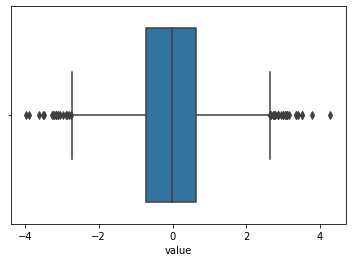

In [108]:
sns.boxplot(data=df,x=df['value'])

#### Z SCORE

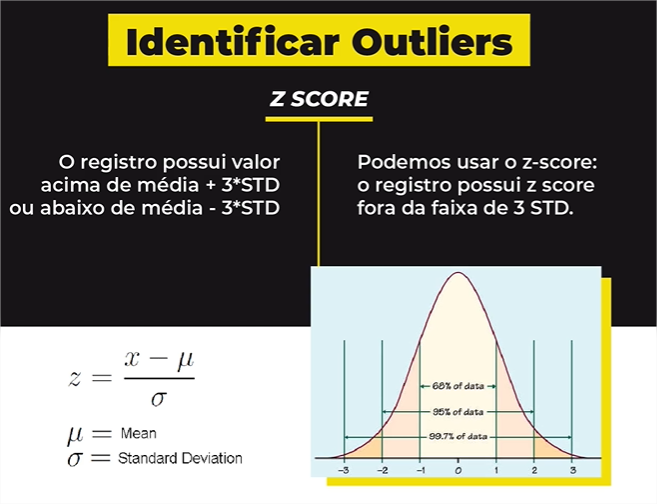

In [109]:
from scipy import stats

z = np.abs(stats.zscore(df.value))
print(z)

[1.32268673 0.68378702 0.41126788 ... 0.11446402 0.3617303  0.21350361]


In [110]:
df[z>3].shape

(26, 1)

In [111]:
new_df = df[z<3]
new_df.shape

(4974, 1)

In [112]:
lower_bound = df.value.mean()-3*df.value.std()
lower_bound = df.value.mean()+3*df.value.std()

df[(df.value<lower_bound)] = lower_bound
df[(df.value>upper_bound)] = upper_bound

In [113]:
df.describe()

,value
count,5.000000e+03
mean,2.649163e+00
std,5.196363e-14
min,2.649163e+00
25%,2.649163e+00
50%,2.649163e+00
75%,2.649163e+00
max,2.649163e+00


### 15. Tratamento de Datas

In [114]:
df = pd.DataFrame({'dt_compra': {0: '26/01/2016', 1: '5/11/2016'}, 'dt_venda': {0: '26/2/16', 1: '9/11/16'}})
df

,dt_compra,dt_venda
0,26/01/2016,26/2/16
1,5/11/2016,9/11/16


In [115]:
df['dt_compra'] = pd.to_datetime(df['dt_compra'].astype(str), format='%d/%m/%Y')

df['dt_venda'] = pd.to_datetime(df['dt_venda'].astype(str), format='%d/%m/%y')

df

,dt_compra,dt_venda
0,2016-01-26,2016-02-26
1,2016-11-05,2016-11-09


In [116]:
df['qt_dias_dif'] = df['dt_venda'] - df['dt_compra']
df

,dt_compra,dt_venda,qt_dias_dif
0,2016-01-26,2016-02-26,31 days
1,2016-11-05,2016-11-09,4 days


In [117]:
df['qt_dias_dif'] = df['qt_dias_dif'].map(lambda x: x.components.days)
df

,dt_compra,dt_venda,qt_dias_dif
0,2016-01-26,2016-02-26,31
1,2016-11-05,2016-11-09,4


### 16. Rolling Filters

In [118]:
import sklearn.datasets

df = sklearn.datasets.load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [120]:
df = pd.DataFrame(sklearn.datasets.load_boston()['target'], columns=['value'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

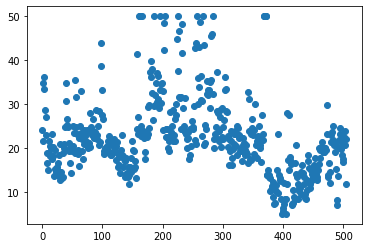

In [121]:
plt.scatter(x=df.index, y=df['value'])
plt.show()

In [122]:
df['less_noise_value'] = df.value.rolling(window=20).mean()

<function matplotlib.pyplot.show>

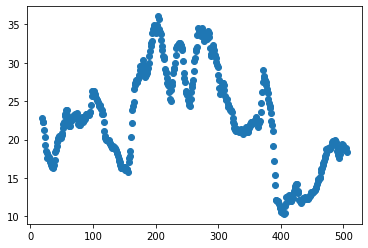

In [123]:
plt.scatter(x=df.index, y=df['less_noise_value'])
plt.show